<a href="https://colab.research.google.com/github/PeriniM/Multilateration/blob/main/2D_space/Multilateration_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
%reset -f
from scipy.optimize import fsolve
import random as rnd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from google.colab import files

In [77]:
x1, y1, x2_gen, y2_gen, x3_gen, y3_gen, x4_gen, y4_gen, x5_gen, y5_gen = (rnd.SystemRandom().random() for x in range(10))

# Multirateration 4 points in a plane (1 known)

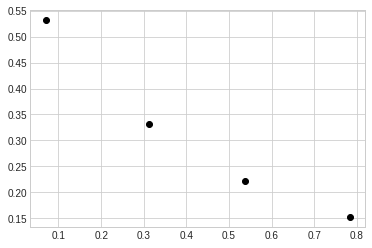

In [78]:
plt.plot([x1, x2_gen, x3_gen, x4_gen], [y1, y2_gen, y3_gen, y4_gen], 'o', color='black');

In [70]:
d12 = np.sqrt((x1-x2_gen)**2 + (y1-y2_gen)**2)
d13 = np.sqrt((x1-x3_gen)**2 + (y1-y3_gen)**2)
d14 = np.sqrt((x1-x4_gen)**2 + (y1-y4_gen)**2)
d23 = np.sqrt((x2_gen-x3_gen)**2 + (y2_gen-y3_gen)**2)
d24 = np.sqrt((x2_gen-x4_gen)**2 + (y2_gen-y4_gen)**2)
d34 = np.sqrt((x3_gen-x4_gen)**2 + (y3_gen-y4_gen)**2)

In [71]:
print(d12,d13,d14,d23,d24,d34, sep="\n")

0.7066578315918645
0.14907641868858992
0.6108970437389395
0.7350284350510325
0.5930773804755572
0.5103538412294145


In [72]:
def equations(vars): 
    x2, y2, x3, y3, x4, y4 = vars
    eq1 = (x1-x2)**2 + (y1-y2)**2 - d12**2
    eq2 = (x1-x3)**2 + (y1-y3)**2 - d13**2
    eq3 = (x1-x4)**2 + (y1-y4)**2 - d14**2

    eq4 = (x2-x3)**2 + (y2-y3)**2 - d23**2
    eq5 = (x2-x4)**2 + (y2-y4)**2 - d24**2

    eq6 = (x3-x4)**2 + (y3-y4)**2 - d34**2
    return [eq1, eq2, eq3, eq4, eq5, eq6]

In [73]:

x2, y2, x3, y3, x4, y4 =  fsolve(equations, [1,1,1,1,1,1])

print(x2, y2, x3, y3, x4, y4, sep="\n")

-0.1948311582195937
0.8428506213596485
0.4546010368264519
0.4986056150469345
0.3762402043869073
1.002907730050276


***Actual positions vs predicted positions***

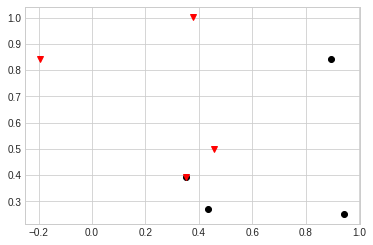

In [74]:
plt.plot([x1, x2_gen, x3_gen, x4_gen], [y1, y2_gen, y3_gen, y4_gen], 'o', color='black'); # intial points
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'v', color='red'); # calculated points

***Distance Error***

We notice that fsolve is able to give the correct distances to all the points but fails in the orientation

In [75]:
d12_pred = np.sqrt((x1-x2)**2 + (y1-y2)**2)
d13_pred = np.sqrt((x1-x3)**2 + (y1-y3)**2)
d14_pred = np.sqrt((x1-x4)**2 + (y1-y4)**2)
d23_pred = np.sqrt((x2-x3)**2 + (y2-y3)**2)
d24_pred = np.sqrt((x2-x4)**2 + (y2-y4)**2)
d34_pred = np.sqrt((x3-x4)**2 + (y3-y4)**2)
err_d12 = np.abs(d12_pred-d12)
err_d13 = np.abs(d13_pred-d13)
err_d14 = np.abs(d14_pred-d14)
err_d23 = np.abs(d23_pred-d23)
err_d24 = np.abs(d24_pred-d24)
err_d34 = np.abs(d34_pred-d34)
print(err_d12,err_d13,err_d14,err_d23,err_d24,err_d34, sep="\n")

6.06514838352723e-13
8.832101716649277e-13
4.594102875898898e-13
2.9976021664879227e-15
8.404388296412435e-14
1.5332179970073412e-13


The predicted positions differ from the actual ones

In [76]:
p1_err = np.sqrt((x1-x1)**2 + (y1-y1)**2)
p2_err = np.sqrt((x2-x2_gen)**2 + (y2-y2_gen)**2)
p3_err = np.sqrt((x3-x3_gen)**2 + (y3-y3_gen)**2)
p4_err = np.sqrt((x4-x4_gen)**2 + (y4-y4_gen)**2)

print(p1_err,p2_err,p3_err,p4_err, sep="\n")

0.0
1.0907511854122636
0.23010468876416215
0.9429410456283497


# Multilateration 5 points in a plane (0 known, just relative positions)

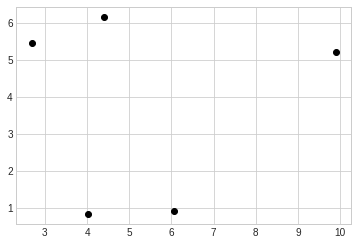

In [ ]:
x1_gen , y1_gen = (x1, y1)
plt.plot([x1_gen, x2_gen, x3_gen, x4_gen, x5_gen], [y1_gen, y2_gen, y3_gen, y4_gen,y5_gen], 'o', color='black');


In [ ]:
d12 = np.sqrt((x1_gen-x2_gen)**2 + (y1_gen-y2_gen)**2)
d13 = np.sqrt((x1_gen-x3_gen)**2 + (y1_gen-y3_gen)**2)
d14 = np.sqrt((x1_gen-x4_gen)**2 + (y1_gen-y4_gen)**2)
d23 = np.sqrt((x2_gen-x3_gen)**2 + (y2_gen-y3_gen)**2)
d24 = np.sqrt((x2_gen-x4_gen)**2 + (y2_gen-y4_gen)**2)
d34 = np.sqrt((x3_gen-x4_gen)**2 + (y3_gen-y4_gen)**2)

d15 = np.sqrt((x1_gen-x5_gen)**2 + (y1_gen-y5_gen)**2)
d25 = np.sqrt((x2_gen-x5_gen)**2 + (y2_gen-y5_gen)**2)
d35 = np.sqrt((x3_gen-x5_gen)**2 + (y3_gen-y5_gen)**2)
d45 = np.sqrt((x4_gen-x5_gen)**2 + (y4_gen-y5_gen)**2)

In [ ]:
print(d12,d13,d14,d23,d24,d34,d15,d25,d35,d45, sep="\n")

4.838735314160689
5.367060274722131
2.0346344264635774
1.8653768209964223
5.669833008072849
5.512430739067212
7.337413314327337
7.221194169699947
5.5722866345514355
5.769025085038334


In [ ]:
def equations(vars): 
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = vars
    eq1 = (x1-x2)**2 + (y1-y2)**2 - d12**2
    eq2 = (x1-x3)**2 + (y1-y3)**2 - d13**2
    eq3 = (x1-x4)**2 + (y1-y4)**2 - d14**2

    eq4 = (x2-x3)**2 + (y2-y3)**2 - d23**2
    eq5 = (x2-x4)**2 + (y2-y4)**2 - d24**2

    eq6 = (x3-x4)**2 + (y3-y4)**2 - d34**2

    eq7 = (x1-x5)**2 + (y1-y5)**2 - d15**2
    eq8 = (x2-x5)**2 + (y2-y5)**2 - d25**2
    eq9 = (x3-x5)**2 + (y3-y5)**2 - d35**2
    eq10 = (x4-x5)**2 + (y4-y5)**2 - d45**2
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10]

In [ ]:
x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 =  fsolve(equations, [1,1,1,1,1,1,1,1,1,1])

print(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, sep="\n")

-2.56486539255827
-4.500143045979351
2.0318414753028113
-2.9889695245561536
1.64027218343008
-1.1651536966742404
-3.633718025218855
-2.7688743495939945
-2.2439442978955606
2.8302487441763136


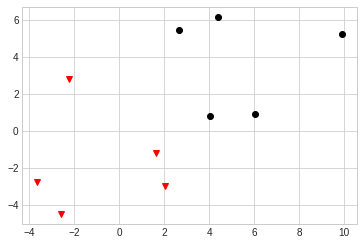

In [ ]:
plt.plot([x1_gen, x2_gen, x3_gen, x4_gen, x5_gen], [y1_gen, y2_gen, y3_gen, y4_gen,y5_gen], 'o', color='black');
plt.plot([x1, x2, x3, x4, x5], [y1, y2, y3, y4, y5], 'v', color='red'); # calculated points

***Distance Error***

In [ ]:
p1_err = np.sqrt((x1-x1_gen)**2 + (y1-y1_gen)**2)
p2_err = np.sqrt((x2-x2_gen)**2 + (y2-y2_gen)**2)
p3_err = np.sqrt((x3-x3_gen)**2 + (y3-y3_gen)**2)
p4_err = np.sqrt((x4-x4_gen)**2 + (y4-y4_gen)**2)
p5_err = np.sqrt((x5-x5_gen)**2 + (y5-y5_gen)**2)

print(p1_err,p2_err,p3_err,p4_err,p5_err, sep="\n")

8.46855519606619
8.479347800780262
7.840873225415616
10.367436506388056
12.37580833528768


# Multi Output Regression Model

In [108]:
model_input = []
model_output = []
for sample in range(1000):
  x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = (rnd.SystemRandom().random() for x in range(10))
  d12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
  d13 = np.sqrt((x1-x3)**2 + (y1-y3)**2)
  d14 = np.sqrt((x1-x4)**2 + (y1-y4)**2)
  d23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
  d24 = np.sqrt((x2-x4)**2 + (y2-y4)**2)
  d34 = np.sqrt((x3-x4)**2 + (y3-y4)**2)
  model_input.append([x1, y1, d12, d13, d14, d23, d24, d34])
  model_output.append([x2, y2, x3, y3, x4, y4, x5, y5])

In [109]:
np.savetxt('model_input.txt',model_input)